# CNN


In [5]:
# Bibliotecas:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import TensorBoard

In [6]:
# Montagem do Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Construção do modelo:
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, padding="same", input_shape=(64, 64, 3),
                                             activation='relu'))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compilação do modelo:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [8]:
# Preparação dos dados:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN_COVID/Data/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN_COVID/Data/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 378 images belonging to 2 classes.
Found 163 images belonging to 2 classes.


In [9]:
# Treinamento do modelo:
history = classifier.fit(training_set,
                         steps_per_epoch=4,
                         epochs=10,
                         validation_data=test_set,
                         validation_steps=4)

Epoch 1/10
4/4 [==============================] - 109s 32s/step - loss: 0.5661 - accuracy: 0.6641 - val_loss: 0.4167 - val_accuracy: 0.8438
Epoch 2/10
4/4 [==============================] - 12s 4s/step - loss: 0.3873 - accuracy: 0.8594 - val_loss: 0.3794 - val_accuracy: 0.8438
Epoch 3/10
4/4 [==============================] - 15s 5s/step - loss: 0.3825 - accuracy: 0.8279 - val_loss: 0.3088 - val_accuracy: 0.8438
Epoch 4/10
4/4 [==============================] - 12s 3s/step - loss: 0.2700 - accuracy: 0.8906 - val_loss: 0.2373 - val_accuracy: 0.8672
Epoch 5/10
4/4 [==============================] - 10s 3s/step - loss: 0.2132 - accuracy: 0.9219 - val_loss: 0.1608 - val_accuracy: 0.9609
Epoch 6/10
4/4 [==============================] - 13s 4s/step - loss: 0.1946 - accuracy: 0.9453 - val_loss: 0.1502 - val_accuracy: 0.9531
Epoch 7/10
4/4 [==============================] - 9s 3s/step - loss: 0.0628 - accuracy: 0.9922 - val_loss: 0.1133 - val_accuracy: 0.9453
Epoch 8/10
4/4 [=================

In [10]:
# Salvando o modelo:
classifier.save('/content/drive/MyDrive/CNN_COVID/meu_modelo2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# Carregando e avaliando o modelo:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/CNN_COVID/meu_modelo2.h5')
loaded_model.evaluate(test_set)

6/6 [==============================] - 5s 852ms/step - loss: 0.0533 - accuracy: 0.9755


[0.05332363024353981, 0.9754601120948792]

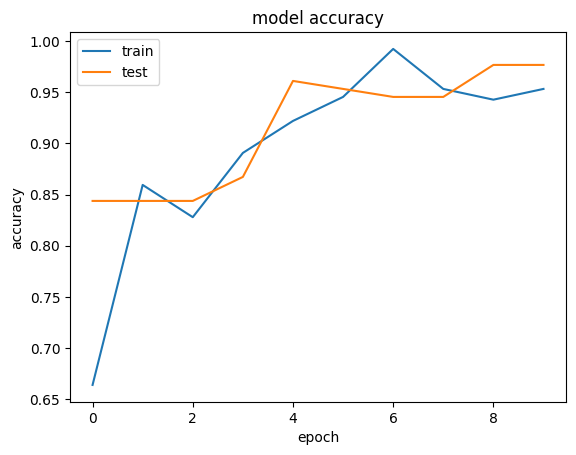

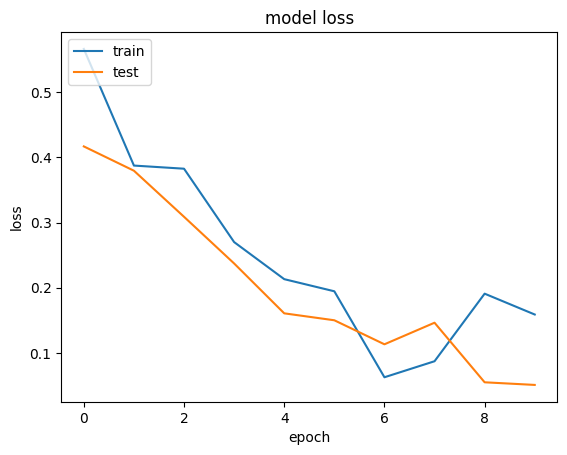

In [12]:
# Plotagem da precisão e perda do modelo:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 150ms/step
Covid


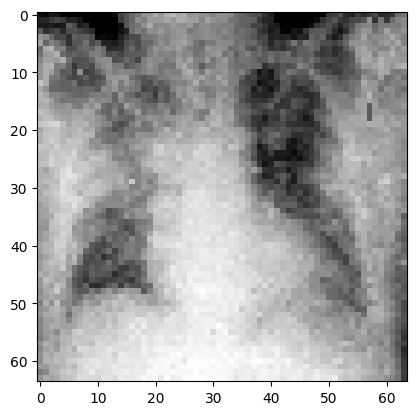

In [13]:
# Predição em uma imagem única da base Covid:
test_image = image.load_img(r'/content/drive/MyDrive/CNN_COVID/Data/test/Covid/16744_1_1.jpg',target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

1/1 [==============================] - 0s 18ms/step
Normal


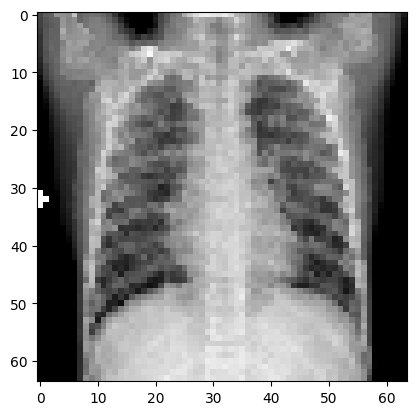

In [14]:
# Predição em uma imagem única da base Normal:
test_image = image.load_img(r'/content/drive/MyDrive/CNN_COVID/Data/test/Normal/NORMAL2-IM-1314-0001.jpeg',target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

Data/test/Normal
Data/train/Normal
Data/train/Covid
Data/test/Covid

In [15]:
# Predição em várias imagens:
y_pred = []
y_test = []
import os

for i in os.listdir("/content/drive/MyDrive/CNN_COVID/Data/test/Normal"):
    img = image.load_img("/content/drive/MyDrive/CNN_COVID/Data/test/Normal/" + i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict(img)
    y_test.append(p[0, 0])
    y_pred.append(1)

for i in os.listdir("/content/drive/MyDrive/CNN_COVID/Data/test/Covid"):
    img = image.load_img("/content/drive/MyDrive/CNN_COVID/Data/test/Covid/" + i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict(img)
    y_test.append(p[0, 0])
    y_pred.append(0)

y_pred = np.array(y_pred)
y_test = np.array(y_test)

1/1 [==============================] - 0s 18ms/step


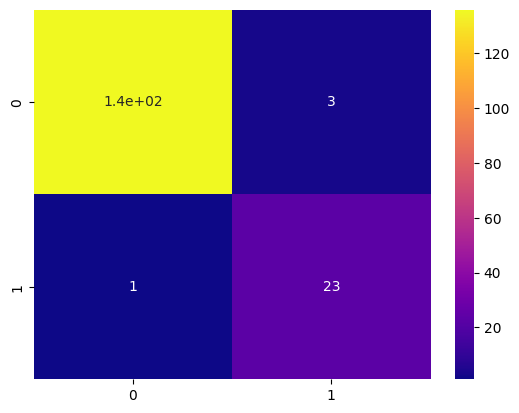

In [16]:
# # Matriz de confusão:
cm = confusion_matrix(y_pred, y_test.round())
sns.heatmap(cm, cmap="plasma", annot=True)
plt.show()

In [17]:
# Impressão do relatório de classificação:
print(classification_report(y_pred, y_test.round()))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       139
           1       0.88      0.96      0.92        24

    accuracy                           0.98       163
   macro avg       0.94      0.97      0.95       163
weighted avg       0.98      0.98      0.98       163



In [ ]:
# Importando as bibliotecas necessárias
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import time

# Log de resultados
log = []

# Definindo os hiperparâmetros expandidos
num_epochs = [5, 10, 20]
batch_sizes = [16, 32, 64]
learning_rates = [0.1, 0.01, 0.005, 0.001, 0.0001]

# Loop através dos hiperparâmetros
for num_epoch in num_epochs:
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:

            # Crie um nome único para cada experimento
            NAME = f"epochs-{num_epoch}-batch_size-{batch_size}-learning_rate-{learning_rate}-{int(time.time())}"

            # Inicialize o TensorBoard
            tensorboard = TensorBoard(log_dir=f'logs/{NAME}')

            # Construa seu modelo aqui (não incluído no exemplo)

            # Compile o modelo com a taxa de aprendizado especificada
            classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                               loss='binary_crossentropy',
                               metrics=['accuracy'])

            # Treine o modelo com os callbacks do TensorBoard
            history = classifier.fit(training_set,
                                     steps_per_epoch=4,
                                     epochs=num_epoch,
                                     validation_data=test_set,
                                     validation_steps=4,
                                     callbacks=[tensorboard])

            # Registrar os resultados
            final_train_accuracy = history.history['accuracy'][-1]
            final_val_accuracy = history.history['val_accuracy'][-1]
            log_entry = {
                'num_epoch': num_epoch,
                'batch_size': batch_size,
                'learning_rate': learning_rate,
                'final_train_accuracy': final_train_accuracy,
                'final_val_accuracy': final_val_accuracy,
            }
            log.append(log_entry)

            print(f"Finished training with {log_entry}")

# Depois que todos os experimentos terminarem, você pode salvar ou analisar o log.

Epoch 1/5
4/4 [==============================] - 11s 3s/step - loss: 1992.4492 - accuracy: 0.5234 - val_loss: 30.3843 - val_accuracy: 0.1641
Epoch 2/5
4/4 [==============================] - 14s 4s/step - loss: 10.9581 - accuracy: 0.6639 - val_loss: 1.0288 - val_accuracy: 0.8516
Epoch 3/5
4/4 [==============================] - 8s 3s/step - loss: 0.5385 - accuracy: 0.8750 - val_loss: 0.4736 - val_accuracy: 0.8672
Epoch 4/5
4/4 [==============================] - 10s 3s/step - loss: 0.5275 - accuracy: 0.8594 - val_loss: 0.5612 - val_accuracy: 0.8438
Epoch 5/5
4/4 [==============================] - 13s 4s/step - loss: 0.5632 - accuracy: 0.7891 - val_loss: 0.4922 - val_accuracy: 0.8594
Finished training with {'num_epoch': 5, 'batch_size': 16, 'learning_rate': 0.1, 'final_train_accuracy': 0.7890625, 'final_val_accuracy': 0.859375}
Epoch 1/5
4/4 [==============================] - 12s 3s/step - loss: 0.4180 - accuracy: 0.8828 - val_loss: 0.3430 - val_accuracy: 0.9062
Epoch 2/5
4/4 [============

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/

In [ ]:
tensorboard dev upload --logdir logs \
    --name "Teste hiperparâmetros 2" \
    --description "Testando outros hiperparametros para ver como o modelo se comporta."